Automatically created module for IPython interactive environment
(4, 547, 421)
[[ 9.625  9.625  9.625 ...  3.625  3.5    3.75 ]
 [ 9.625  9.625  9.75  ...  3.375  3.5    3.75 ]
 [ 9.625  9.75   9.75  ...  3.375  3.375  3.375]
 ...
 [10.75  10.75  10.75  ...  8.75   8.75   8.75 ]
 [10.75  10.75  10.75  ...  8.75   8.75   8.75 ]
 [10.75  10.75  10.75  ...  8.75   8.75   8.75 ]]
(547, 421)
547
standard: 0.64 sec
[[ 0.03910117 -0.07373738 -0.03478691]
 [ 0.03886748 -0.07370459 -0.03461366]
 [ 0.03857858 -0.07476709 -0.03504185]
 ...
 [-0.05332434  0.00114883  0.07060239]
 [-0.05339682  0.00148612  0.0696385 ]
 [-0.0537649   0.00212196  0.06816554]]
(547, 3)
ltsa: 1.2 sec
[[ 0.01273506  0.01815987  0.05565662]
 [ 0.01236978  0.01781284  0.05556866]
 [ 0.01141862  0.01667196  0.05574121]
 ...
 [-0.02364071 -0.01495796 -0.02048252]
 [-0.02344104 -0.01498781 -0.0199474 ]
 [-0.02338013 -0.01505276 -0.01958373]]
(547, 3)
hessian: 1.5 sec
[[-0.01273225  0.01811689 -0.05564796]
 [-0.01234141  0.01

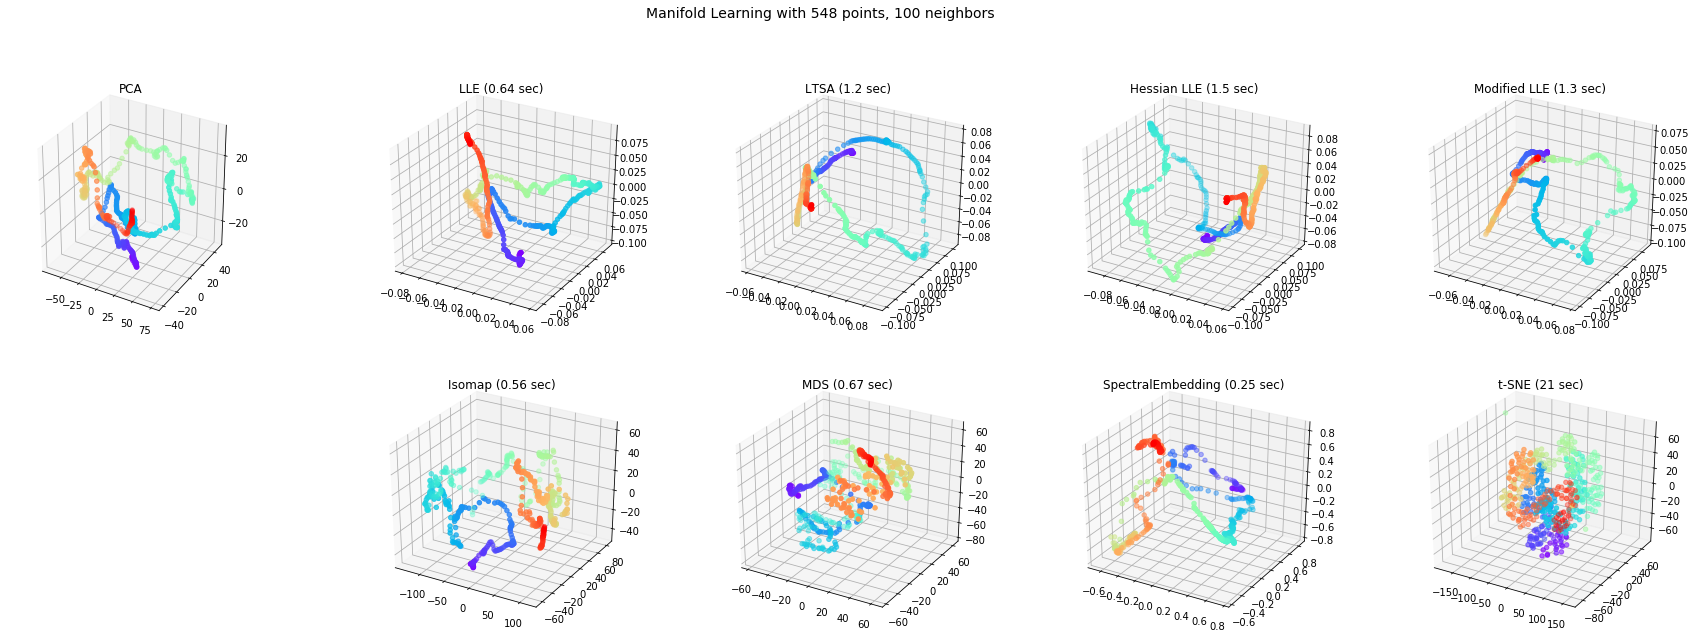

In [2]:
print(__doc__)
import warnings
warnings.filterwarnings('ignore')
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import numpy as np
import iris
import matplotlib.cm as cm

from sklearn import manifold, datasets, decomposition

# Next line to silence pyflakes. This import is needed.
Axes3D

mydata = iris.load("./prods_op_mogreps-uk_20130101_03_00_003.nc")
var = mydata.extract('x_wind')
var = var[2]
# Pay attention. Most of the time the variable var[1] has the shape of (a,b,c), where a, b and c numbers. 
# However, sometimes the variable has the shape of (a,b,c,d), where a,b,c and d are numbers.
# For example, sometimes when we consider 'x_wind' then var[2] has the shape (4,548,421), while others has the shape (4,2,547,421).
# For the latter, we will get a problem since the code is set for the shape of var of the type (a,b,c).
# However, this problem can be easily solved by changing the code accordingly.


X = var.data

n_points = 548
n_neighbors = 100
n_components = 3

fig = plt.figure(figsize=(30, 10))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (n_points, n_neighbors), fontsize=14)
print(X.shape)
W = np.array(X)

WW = W[1]
print(WW)
print(WW.shape)


color = cm.rainbow(np.linspace(0, 1, len(WW)))
print(len(WW))
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(WW)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))
    print(Y)
    print(Y.shape)
    ax = fig.add_subplot(252 + i, projection='3d')
    ax.scatter(Y[:, 0], Y[:, 1], Y[:,2], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    #ax.xaxis.set_major_formatter(NullFormatter())
    #ax.yaxis.set_major_formatter(NullFormatter())
    #plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(WW)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257, projection='3d')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))



t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(WW)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258, projection='3d')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))



t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(WW)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259, projection='3d')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))


t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(WW)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10, projection='3d')
#plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
#ax = fig.add_subplot(260, projection='3d')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))


pca = decomposition.PCA(n_components=3)
pca.fit(WW)
Y = pca.transform(WW)
print(Y.shape)


ax = fig.add_subplot(261, projection='3d')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c= cm.rainbow(np.linspace(0, 1, len(WW))), cmap=plt.cm.Spectral)
plt.title("PCA")


plt.show()